In [19]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("RT_database.db")
cursor = conn.cursor()

df = pd.read_csv("ZIPPEDDATA/rt.movie_info.tsv.gz", sep="\t")
df.to_sql('rt_movie_info',conn, if_exists='replace',index=False)

In [20]:
# Create the query for creating the table
create_table_query = """
CREATE TABLE IF NOT EXISTS movies (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    genre TEXT,
    director TEXT,
    year INTEGER,
    rating REAL
);
"""

# Execute the CREATE TABLE query using the cursor
cursor.execute(create_table_query)

# Commit the changes to the database
conn.commit()


In [21]:
create_table_query = """SELECT * 
FROM rt_movie_info 
LIMIT 10;"""
result = pd.read_sql_query(create_table_query, conn)
result

id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                               None     NR   
5   8  The year is 1942. As the Allies unite overseas...     PG   
6  10  Some cast and crew from NBC's highly acclaimed...  PG-13   
7  13  Stewart Kane, an Irishman living in the Austra...      R   
8  14  "Love Ranch" is a bittersweet love story that ...      R   
9  15  When a diamond expedition in the Congo is lost...  PG-13   

                                               genre          director  \
0                Action and Adventure|Classics|Drama  William Friedkin   
1                  Drama|Science Fiction and Fantasy  David Cronenberg   
2                  Drama|Musical and Performing Arts    Allison Anders   
3                         Drama|Mystery and Suspense    Barry Levinson   
4                                      Drama|Romance    Rodney Bennett   
5                              Drama|Kids and Family       Jay Russell   
6                                             Comedy       Jake Kasdan   
7                                              Drama      Ray Lawrence   
8                                              Drama   Taylor Hackford   
9  Action and Adventure|Mystery and Suspense|Scie...    Frank Marshall   

                             writer  theater_date      dvd_date currency  \
0                    Ernest Tidyman   Oct 9, 1971  Sep 25, 2001     None   
1      David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                    Allison Anders  Sep 13, 1996  Apr 18, 2000     None   
3   Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997     None   
4                      Giles Cooper          None          None     None   
5                   Gail Gilchriest   Mar 3, 2000  Jul 11, 2000     None   
6                        Mike White  Jan 11, 2002  Jun 18, 2002        $   
7  Raymond Carver|Beatrix Christian  Apr 27, 2006   Oct 2, 2007        $   
8                     Mark Jacobson  Jun 30, 2010   Nov 9, 2010        $   
9              John Patrick Shanley   Jun 9, 1995  Jul 27, 1999     None   

   box_office      runtime                  studio  
0        None  104 minutes                    None  
1     600,000  108 minutes       Entertainment One  
2        None  116 minutes                    None  
3        None  128 minutes                    None  
4        None  200 minutes                    None  
5        None   95 minutes   Warner Bros. Pictures  
6  41,032,915   82 minutes      Paramount Pictures  
7     224,114  123 minutes  Sony Pictures Classics  
8     134,904  117 minutes                    None  
9        None  108 minutes                    None

In [22]:
query = """
SELECT writer, genre, box_office
FROM rt_movie_info
WHERE (genre LIKE '%Action%' OR genre LIKE '%Horror%') AND writer IS NOT NULL
ORDER BY CAST(box_office AS UNSIGNED) DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result

#top writers for box office hits Peter Jackson,Philippa Boyens, Guiermo del Toro

writer  \
0  Peter Jackson|Philippa Boyens|Guillermo del To...   
1                 John Logan|Robert Wade|Neal Purvis   
2        Gene Roddenberry|Alex Kurtzman|Roberto Orci   
3                          Josh Friedman|David Koepp   
4     Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo   

                                               genre   box_office  
0   Action and Adventure|Science Fiction and Fantasy  303,001,229  
1          Action and Adventure|Mystery and Suspense  299,300,000  
2  Action and Adventure|Drama|Science Fiction and...  257,704,099  
3   Action and Adventure|Science Fiction and Fantasy  234,141,872  
4                  Action and Adventure|Comedy|Drama  227,946,274

<ipython-input-23-83e8990e11a9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(writers, rotation=45, ha='right')


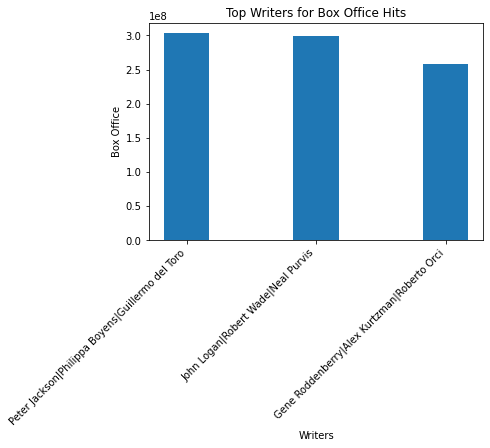

In [ ]:
import matplotlib.pyplot as plt

writers = ["Peter Jackson|Philippa Boyens|Guillermo del Toro", "John Logan|Robert Wade|Neal Purvis", "Gene Roddenberry|Alex Kurtzman|Roberto Orci"]
box_offices = [303001229, 299300000, 257704099]

fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(writers, box_offices, bar_width)

ax.set_xlabel('Writers')
ax.set_ylabel('Box Office')
ax.set_title('Top Writers for Box Office Hits')
ax.set_xticklabels(writers, rotation=45, ha='right')

plt.show()
conn.close()

In [24]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("RT_database.db")
cursor = conn.cursor()

df = pd.read_csv("ZIPPEDDATA/rt.movie_info.tsv.gz", sep="\t")
df.to_sql('rt_movie_info',conn, if_exists='replace',index=False)

# Create the query for creating the table
create_table_query = """
CREATE TABLE IF NOT EXISTS movies (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    genre TEXT,
    director TEXT,
    year INTEGER,
    rating REAL
);
"""

# Execute the CREATE TABLE query using the cursor
cursor.execute(create_table_query)

# Commit the changes to the database
conn.commit()


In [25]:
query = """
SELECT genre, box_office, runtime
FROM rt_movie_info
WHERE (genre LIKE '%Action%' OR genre LIKE '%Horror%') AND writer IS NOT NULL
ORDER BY CAST(box_office AS UNSIGNED) DESC
LIMIT 5;
"""
result = pd.read_sql_query(query, conn)
result

#top writers for box office hits Peter Jackson,Philippa Boyens, Guiermo del Toro

genre   box_office      runtime
0   Action and Adventure|Science Fiction and Fantasy  303,001,229  170 minutes
1          Action and Adventure|Mystery and Suspense  299,300,000  145 minutes
2  Action and Adventure|Drama|Science Fiction and...  257,704,099  127 minutes
3   Action and Adventure|Science Fiction and Fantasy  234,141,872  117 minutes
4                  Action and Adventure|Comedy|Drama  227,946,274   92 minutes

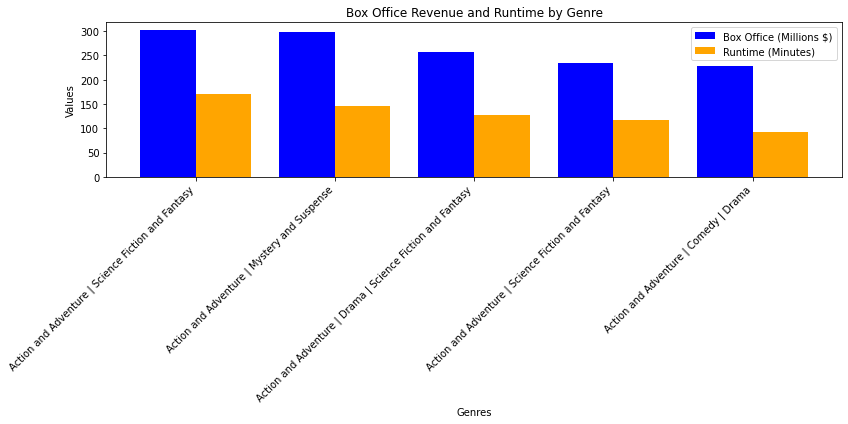

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

genres = [
    "Action and Adventure | Science Fiction and Fantasy",
    "Action and Adventure | Mystery and Suspense",
    "Action and Adventure | Drama | Science Fiction and Fantasy",
    "Action and Adventure | Science Fiction and Fantasy",
    "Action and Adventure | Comedy | Drama"
]

box_office = [303001229, 299300000, 257704099, 234141872, 227946274]
box_office_millions = [value / 1e6 for value in box_office]

runtime = [170, 145, 127, 117, 92]

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(genres))

bar_width = 0.4

ax.bar(x - bar_width/2, box_office_millions, bar_width, label='Box Office (Millions $)', color='blue')
ax.bar(x + bar_width/2, runtime, bar_width, label='Runtime (Minutes)', color='orange')

ax.set_xlabel('Genres')
ax.set_ylabel('Values')
ax.set_title('Box Office Revenue and Runtime by Genre')
ax.set_xticks(x)
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.legend()


plt.tight_layout()
plt.show()

#Longer runtimes don't correlate with higher box office revenue, but there seems to be a trend.
